[-6.03625077e-06  3.67207618e-06 -5.88593985e-03  7.60472265e-06
  1.77829236e-05  1.95902060e-02  1.03287889e-02 -3.42052273e-02
  9.99152089e-01]
test_AF
[ 0.03342239  0.0304095  -0.02878272  0.05143261 -0.06924745  0.00817327
 -0.00440627  0.00461007 -0.00588817 -0.0091947 ]
[ 0.28708536 -0.95789422 -0.00454503]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[-0.32263499 -0.42506823 -0.29969494  1.        ]
 [-0.24221275 -0.85046083 -0.29969888  1.        ]
 [-0.19227405 -0.89536782 -0.29969935  1.        ]
 [-0.25412745 -0.71297012 -0.29969548  1.        ]
 [-0.28254524 -0.62850791 -0.29969461  1.        ]
 [-0.02532093 -0.0085418  -0.29970405  1.        ]
 [-0.04560339 -0.01276319 -0.29970384  1.        ]
 [-0.27110346 -0.19533168 -0.29969835  1.        ]
 [-0.34431692 -0.38187533 -0.29969628  1.        ]
 [-0.1642371  -0.08316173 -0.29970087  1.        ]]
[-0.32263499 -0.42506823 -0.29969494  1.        ]
[-0.24221275 -0.85046083 -0.29969888  1.        ]
[-0.19227405 -0.89536782 -

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


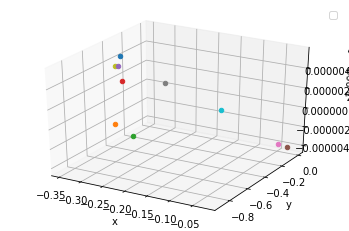

In [2]:
#https://www.google.com/search?rlz=1C1CHBD_enSG862SG863&sxsrf=ALeKk01-58Dx9ph8rNFReMmlgeqOXbXnpg%3A1584170013821&ei=HYRsXoPaMf_7z7sPyeqyuAU&q=iphone+7+camera+pixel+size&oq=iphone+7+camera+pixel+&gs_l=psy-ab.1.1.35i39j0l3j0i22i30l6.82510.85463..87152...0.1..0.109.257.2j1......0....1j2..gws-wiz.......0i71j0i67j0i273j0i7i30.JNyOWCbYQ6k
#https://stackoverflow.com/questions/23943602/essential-matrix-from-fundamental-matrix-%20in-opencv
#iphone 7 camera focal length: 28mm
#1.22 µm


import pandas as pd
from numpy import linalg as LA
import numpy as np
#pd.read_csv?
co_data = pd.read_csv('F:/3D/Reconstruction/project 1 - recon/data.csv', sep =",")

#P297
co_data['x2x1'] = co_data['x2'] * co_data['x1']
co_data['x2y1'] = co_data['x2'] * co_data['y1']

co_data['y2x1'] = co_data['y2'] * co_data['x1']
co_data['y2y1'] = co_data['y2'] * co_data['y1']


data_cleaned = pd.DataFrame()
data_cleaned['x2x1'] = co_data['x2x1']
data_cleaned['x2y1'] = co_data['x2y1']
data_cleaned['x2'] = co_data['x2']
data_cleaned['y2x1'] = co_data['y2x1']
data_cleaned['y2y1'] = co_data['y2y1']
data_cleaned['y2'] = co_data['y2']
data_cleaned['x1'] = co_data['x1']
data_cleaned['y1'] = co_data['y1']
data_cleaned['1'] = 1
data_cleaned
A = data_cleaned.to_numpy()

ATA = A.T.dot(A)

w, V = LA.eig(ATA)
#print(V)
f = V[:, -1]
print(f)

test_AF = A.dot(f.T)
print("test_AF")
print(test_AF)


f_factor = f[0] + f[2] + f[4] + f[6] + f[8] - f[1] - f[3] - f[5] - f[7] 
f_factor

F = np.reshape(f, (3,3))
F


point_1 = pd.DataFrame()
point_2 = pd.DataFrame()
point_1 = co_data[['x1','y1','z1']]
point_2 = co_data[['x2','y2','z2']]
point_1

point_1_matrix = point_1.to_numpy()
point_2_matrix = point_2.to_numpy()
L2 = F.dot(point_1_matrix.T)
L2 
#point_1_matrix

BTB = L2.dot(L2.T)
L2_w, L2_V = LA.eig(BTB)
#print(L2_V)
e2 = L2_V[:, -1]

print(e2)

P1 = np.array( [[1,0,0,0],[0,1,0,0],[0,0,1,0]])
P2 = np.array([[0.0] * 4] * 3)
e2_x = np.array([[0.0] * 3] * 3)
print(P2)

e2_x[0,1] = -1 * e2[2]
e2_x[0,2] = e2[1]
e2_x[1,0] = e2[2]
e2_x[1,2] = -1 * e2[0]
e2_x[2,0] = -1 * e2[1]
e2_x[2,1] = e2[0]
P2
P2_e2_x = e2_x * F
for i in range(0,3):
    for j in range(0,3):
        P2[i][j] = P2_e2_x[i][j]

P2[0,3] = e2[0]
P2[1,3] = e2[1]
P2[2,3] = e2[2]
P2

C = np.array([[0.0] * 4] * 4)
X = np.array([[0.0] * 4] * 10)
for i in range (0,10):
    x1 = co_data['x1'].to_numpy()[i]
    y1 = co_data['y1'].to_numpy()[i]
    x2 = co_data['x2'].to_numpy()[i]
    y2 = co_data['y2'].to_numpy()[i]
    C[0] = x1 * P1[2] - P1[0]
    C[1] = y1 * P1[2] - P1[1]
    C[2] = x2 * P1[2] - P2[0]
    C[3] = y1 * P1[2] - P2[1]
    CCT = C.dot(C.T)
    C_w, C_V = LA.eig(CCT)
    #print(L2_V)
    X[i] = C_V[:, -1]
    X[i] = X[i] / X[i][3]
print(X)

print(X[:][0])
print(X[:][1])
print(X[:][2])

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.legend('a','b')
for i in range(0,10):
    ax.scatter(X[i][0], X[i][1], X[i][2], marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

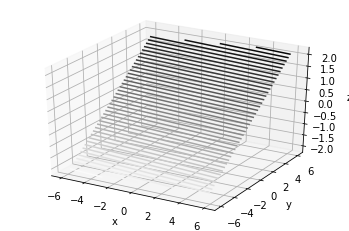

In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return (x * 0.2 + y * 2)/6

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
np.reshape?


In [57]:
#https://www.google.com/search?rlz=1C1CHBD_enSG862SG863&sxsrf=ALeKk01-58Dx9ph8rNFReMmlgeqOXbXnpg%3A1584170013821&ei=HYRsXoPaMf_7z7sPyeqyuAU&q=iphone+7+camera+pixel+size&oq=iphone+7+camera+pixel+&gs_l=psy-ab.1.1.35i39j0l3j0i22i30l6.82510.85463..87152...0.1..0.109.257.2j1......0....1j2..gws-wiz.......0i71j0i67j0i273j0i7i30.JNyOWCbYQ6k
#https://stackoverflow.com/questions/23943602/essential-matrix-from-fundamental-matrix-%20in-opencv
#iphone 7 camera focal length: 28mm
#1.22 µm

n=188

import pandas as pd
from numpy import linalg as LA
import numpy as np
from scipy.linalg import svd
#pd.read_csv?

f = 28*1000/1.22
pic_x = 4032/2
pic_y = 3024/2

#calculate Camera_Matrix
Camera_Matrix = np.array( [[f,0,pic_x],[0,f,pic_y],[0,0,1]])
#print(Camera_Matrix)

#Calculate F matrix:
co_data = pd.read_csv('C:/Users/Magic/Play_Ground/3D_Reconstructioin/data.csv', sep =",")

#P297
co_data['x2x1'] = co_data['x2'] * co_data['x1']
co_data['x2y1'] = co_data['x2'] * co_data['y1']

co_data['y2x1'] = co_data['y2'] * co_data['x1']
co_data['y2y1'] = co_data['y2'] * co_data['y1']

data_cleaned = pd.DataFrame()
data_cleaned['x2x1'] = co_data['x2x1']
data_cleaned['x2y1'] = co_data['x2y1']
data_cleaned['x2'] = co_data['x2']
data_cleaned['y2x1'] = co_data['y2x1']
data_cleaned['y2y1'] = co_data['y2y1']
data_cleaned['y2'] = co_data['y2']
data_cleaned['x1'] = co_data['x1']
data_cleaned['y1'] = co_data['y1']
data_cleaned['1'] = 1
#data_cleaned

A = data_cleaned.to_numpy()
ATA = A.T.dot(A)
w, V = LA.eig(ATA)
#print('V')
#print(V)
f = V[:, -1]






#print(f)

#test_AF = A.dot(f.T)
#print("test_AF")
#print(test_AF)
#f_factor = f[0] + f[2] + f[4] + f[6] + f[8] - f[1] - f[3] - f[5] - f[7] 
#f_factor
F = np.reshape(f, (3,3))
#print('F:')
#print(F)

# Calculaate E Matrix:

E = Camera_Matrix.T.dot(F).dot(Camera_Matrix)
#print("E:")
#print(E)



U_E, s_E, VT_E = svd(E)
#print('U_E:')
#print(U_E)
#print(s)
#print('VT_E:')
#print(VT_E)

W = np.array( [[0,-1,0],[1,0,0],[0,0,1]])


R1 = U_E.dot(W).dot(VT_E)
R2 = U_E.dot(W.T).dot(VT_E)

T1 = U_E[:, -1]
T2 = U_E[:, -1] * -1

#print('R1:')
#print(R1)
#print(np.linalg.det(R1))

#print('R2:')
#print(R2)
##print(np.linalg.det(R2))

#print('T1:')
#print(T1)

#print('T2:')
#print(T2)


U_F, s_F, VT_F = svd(F)
#print('U_F:')
#print(U_F)
#print(s)
#print('VT_F:')
#print(VT_F)
e = VT_F.T[:, -1]

#print('e')
#print(e)



U_FT, s_FT, VT_FT = svd(F.T)
#print('U_FT:')
#print(U_FT)
#print(s)
#print('VT_FT:')
#print(VT_FT)
e_2 = VT_FT.T[:, -1]

#print('e_2')
#print(e_2)

#P2 = np.cross(e, F)
#print('P2:')
#print(P2)

ex = np.array([[0,-1*e[2],e[1]],[e[2],0,-1*e[0]],[-1*e[1],e[0],0]])
P2 = np.zeros((4,3))
P2 = np.hstack((ex.dot(F),[[e_2[0]],[e_2[1]],[e_2[2]]]))

#print('P2:')
#print(P2)


P1 = np.array( [[1,0,0,0],[0,1,0,0],[0,0,1,0]])


point_1 = pd.DataFrame()
point_2 = pd.DataFrame()
point_1 = co_data[['x1','y1','z1']]
point_2 = co_data[['x2','y2','z2']]
point_1

point_1_matrix = point_1.to_numpy()
point_2_matrix = point_2.to_numpy()



C = np.array([[0.0] * 4] * 4)
X = np.array([[0.0] * 4] * n)
#print(X)
for i in range (0,n):
    x1 = co_data['x1'].to_numpy()[i]
    y1 = co_data['y1'].to_numpy()[i]
    x2 = co_data['x2'].to_numpy()[i]
    y2 = co_data['y2'].to_numpy()[i]
    C[0] = y1 * P1[2] - P1[1]
    C[1] = P1[0] - x1 * P1[2]
    C[2] = y2 * P2[2] - P2[1]
    C[3] = P2[0] - x2 * P2[2]
    #print(C)
    CCT = C.dot(C.T)
    C_w, C_V = LA.eig(CCT)
    #print(L2_V)
    X[i] = C_V[:, -1]
    X[i] = X[i] / X[i][3]



from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
fig = plt.figure()
ax = plt.axes(projection='3d')

#plt.xlim(-1, 1)
#plt.ylim(-1, 1)

for i in range(75,n):
    ax.scatter(X[i][0], X[i][1], X[i][2], marker='o')
#plt.legend(handles=legend_list)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

print(X)


[[ 3.16218368e-03  3.71238219e-03  1.08851824e+00  1.00000000e+00]
 [ 1.53872552e-04  3.26605262e-03  2.26643922e-02  1.00000000e+00]
 [ 4.22534320e-04  3.22306982e-03  1.03848272e-01  1.00000000e+00]
 [ 1.60578232e-03  3.23697272e-03  5.01604691e-01  1.00000000e+00]
 [ 1.30532561e-03  3.16905726e-03  3.77837808e-01  1.00000000e+00]
 [ 1.27145198e-03  3.24626735e-03  3.83036142e-01  1.00000000e+00]
 [ 1.03182159e-03  3.19614966e-03  2.76926282e-01  1.00000000e+00]
 [-1.26021751e-03  3.14868956e-03 -4.20200699e-01  1.00000000e+00]
 [-3.06332042e-03  2.90549171e-03 -1.05004226e+00  1.00000000e+00]
 [ 2.34476993e-03  3.59993988e-03  8.07351842e-01  1.00000000e+00]
 [ 1.89552816e-03  3.53780373e-03  6.52654293e-01  1.00000000e+00]
 [ 1.41549417e-03  3.47117802e-03  4.87243947e-01  1.00000000e+00]
 [ 9.01335761e-04  3.39958041e-03  3.09968093e-01  1.00000000e+00]
 [ 3.49226077e-04  3.32245734e-03  1.19502499e-01  1.00000000e+00]
 [-2.45252041e-04  3.23917018e-03 -8.56817279e-02  1.00000000e

In [5]:
#https://www.quantstart.com/articles/QR-Decomposition-with-Python-and-NumPy/

import pprint
import scipy
import scipy.linalg   # SciPy Linear Algebra Library

A = scipy.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]])  # From the Wikipedia Article on QR Decomposition
Q, R = scipy.linalg.qr(A)

print ('A')
print (A)
print ('Q')
print (Q)

print(Q.dot(Q.T))
print(Q.T.dot(Q))

print ('R')
print (R)


#https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/


# Singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

A
[[ 12 -51   4]
 [  6 167 -68]
 [ -4  24 -41]]
Q
[[-0.85714286  0.39428571  0.33142857]
 [-0.42857143 -0.90285714 -0.03428571]
 [ 0.28571429 -0.17142857  0.94285714]]
[[ 1.00000000e+00  9.70056801e-17 -2.53402741e-17]
 [ 9.70056801e-17  1.00000000e+00 -2.88873234e-17]
 [-2.53402741e-17 -2.88873234e-17  1.00000000e+00]]
[[ 1.00000000e+00 -5.04131884e-17 -3.39864191e-17]
 [-5.04131884e-17  1.00000000e+00  2.30881074e-17]
 [-3.39864191e-17  2.30881074e-17  1.00000000e+00]]
R
[[ -14.  -21.   14.]
 [   0. -175.   70.]
 [   0.    0.  -35.]]
[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  import sys
